<a href="https://colab.research.google.com/github/Suchitra-V31/Deep_Learning_Projects/blob/main/Malaria_Disease_Prediction_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Malaria Disease Prediction**

In this notebook we are going to predict whether the person has malaria or not using the images provided using Convulutional Neural network.

Let us import all the necessary libraries.



In [77]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [53]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Define the data path which contains the data**

In [56]:
data_path='/content/drive/MyDrive/Datasets/Malaria dataset/Train'

In [57]:
data=[]
label=[]
for folder in os.listdir(data_path):
  for file in os.listdir(os.path.join(data_path,folder)):
    if file.endswith('.png'):
      label.append(folder)
      img=cv2.imread(os.path.join(data_path,folder,file))
      img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img_resize=cv2.resize(img_rgb,(128,128))
      data.append(img_resize)
    else:
      continue


Converting all the data into array

In [58]:
num_data=np.array(data)
num_label=np.array(label)

**Converting the categorical values into numerical using Label Encoder**

In [59]:
encoder=LabelEncoder()

In [60]:
y=encoder.fit_transform(num_label)

**Split the data into dependent and independent features**

In [61]:
y=to_categorical(y,2)
X=num_data/255

**Split the features for train and test**

In [62]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

**Design Neural Network Architecture**

In [71]:

#train!!
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))


**Get multiple images using Data Augmentation**

In [72]:
datagen=datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)
datagen.fit(X_train)
datagen.fit(X_test)

**Compile our model**

In [73]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

**Fit our model**

In [74]:
final_model=model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),epochs=64,validation_data=(X_test,y_test),verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
11/11 [==============================] - 4s 355ms/step - loss: 0.7124 - accuracy: 0.5151 - val_loss: 0.6866 - val_accuracy: 0.5357
Epoch 2/64
11/11 [==============================] - 2s 177ms/step - loss: 0.6889 - accuracy: 0.5482 - val_loss: 0.6691 - val_accuracy: 0.5357
Epoch 3/64
11/11 [==============================] - 2s 176ms/step - loss: 0.6630 - accuracy: 0.5904 - val_loss: 0.6214 - val_accuracy: 0.5833
Epoch 4/64
11/11 [==============================] - 2s 177ms/step - loss: 0.6071 - accuracy: 0.7108 - val_loss: 0.5849 - val_accuracy: 0.6905
Epoch 5/64
11/11 [==============================] - 2s 189ms/step - loss: 0.5632 - accuracy: 0.7199 - val_loss: 0.5203 - val_accuracy: 0.7381
Epoch 6/64
11/11 [==============================] - 2s 176ms/step - loss: 0.4841 - accuracy: 0.7771 - val_loss: 0.5658 - val_accuracy: 0.7143
Epoch 7/64
11/11 [==============================] - 2s 176ms/step - loss: 0.4623 - accuracy: 0.7861 - val_loss: 0.4941 - val_accuracy: 0.7500
Epoch 

In [78]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 42ms/step - loss: 0.1362 - accuracy: 0.9762


[0.13618211448192596, 0.976190447807312]

We could see that our model has performed with 97% accuracy.

Let us visualize and see how our model has predicted.

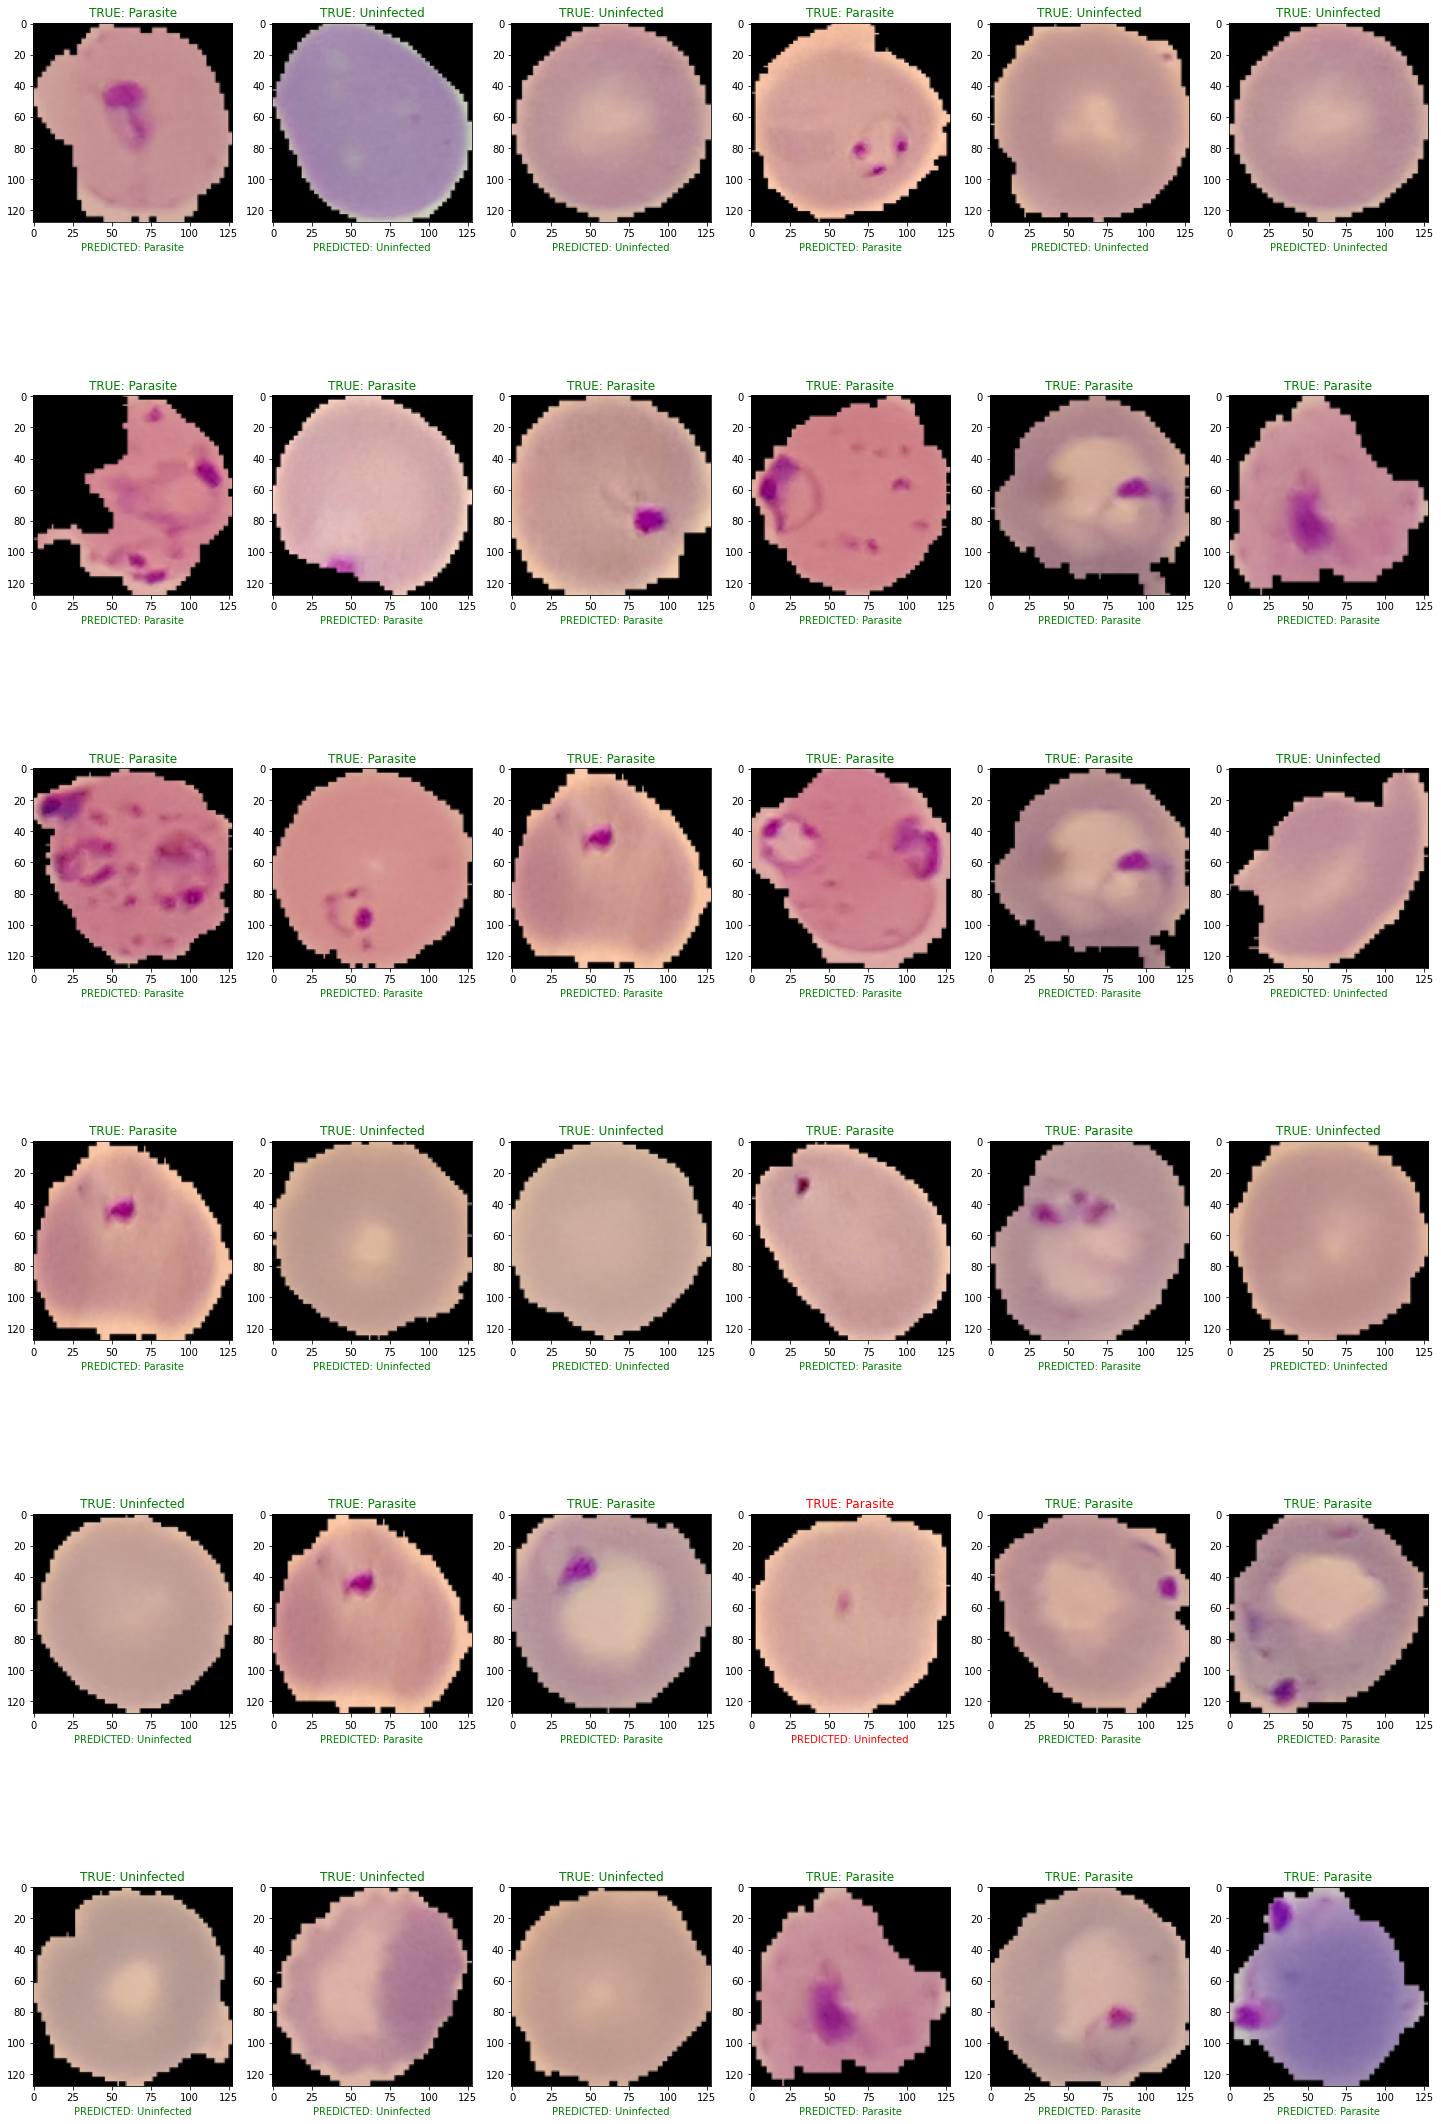

In [79]:
categories=np.sort(os.listdir(data_path))
fig,ax=plt.subplots(6,6,figsize=(25,40))
for i in range(6):
  for j in range(6):
    k=int(np.random.random_sample()*len(X_test))
    if (categories[np.argmax(y_test[k])]==categories[np.argmax(model.predict(X_test)[k])]):
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
      ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')
    else:
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
      ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')

From the above graph, we could see that our model has predicted almost all the images.Now let us test our model with the test data.


**Define the test path**

In [80]:
test_path='/content/drive/MyDrive/Datasets/Malaria dataset/Test'

**Repeat all the data preprocessing techniques for the test data**

In [81]:
test_data=[]
test_label=[]
for folder in os.listdir(test_path):
  for file in os.listdir(os.path.join(test_path,folder)):
    if file.endswith('.png'):
      test_label.append(folder)
      img=cv2.imread(os.path.join(test_path,folder,file))
      img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img_resize=cv2.resize(img_rgb,(128,128))
      test_data.append(img_resize)
    else:
      continue


In [82]:
test_data=np.array(test_data)
test_label=np.array(test_label)

In [83]:
test_y=encoder.fit_transform(test_label)

In [84]:
test_y=to_categorical(test_y,2)
test_X=test_data/255

**Evaluate our model with the test data**

In [85]:
model.evaluate(test_X,test_y)

5/5 [==============================] - 1s 137ms/step - loss: 0.1803 - accuracy: 0.9254


[0.1802547723054886, 0.9253731369972229]

We could see that our model has predicted with 92% accuracy.

Let us visualize and see the prediction history of test data.

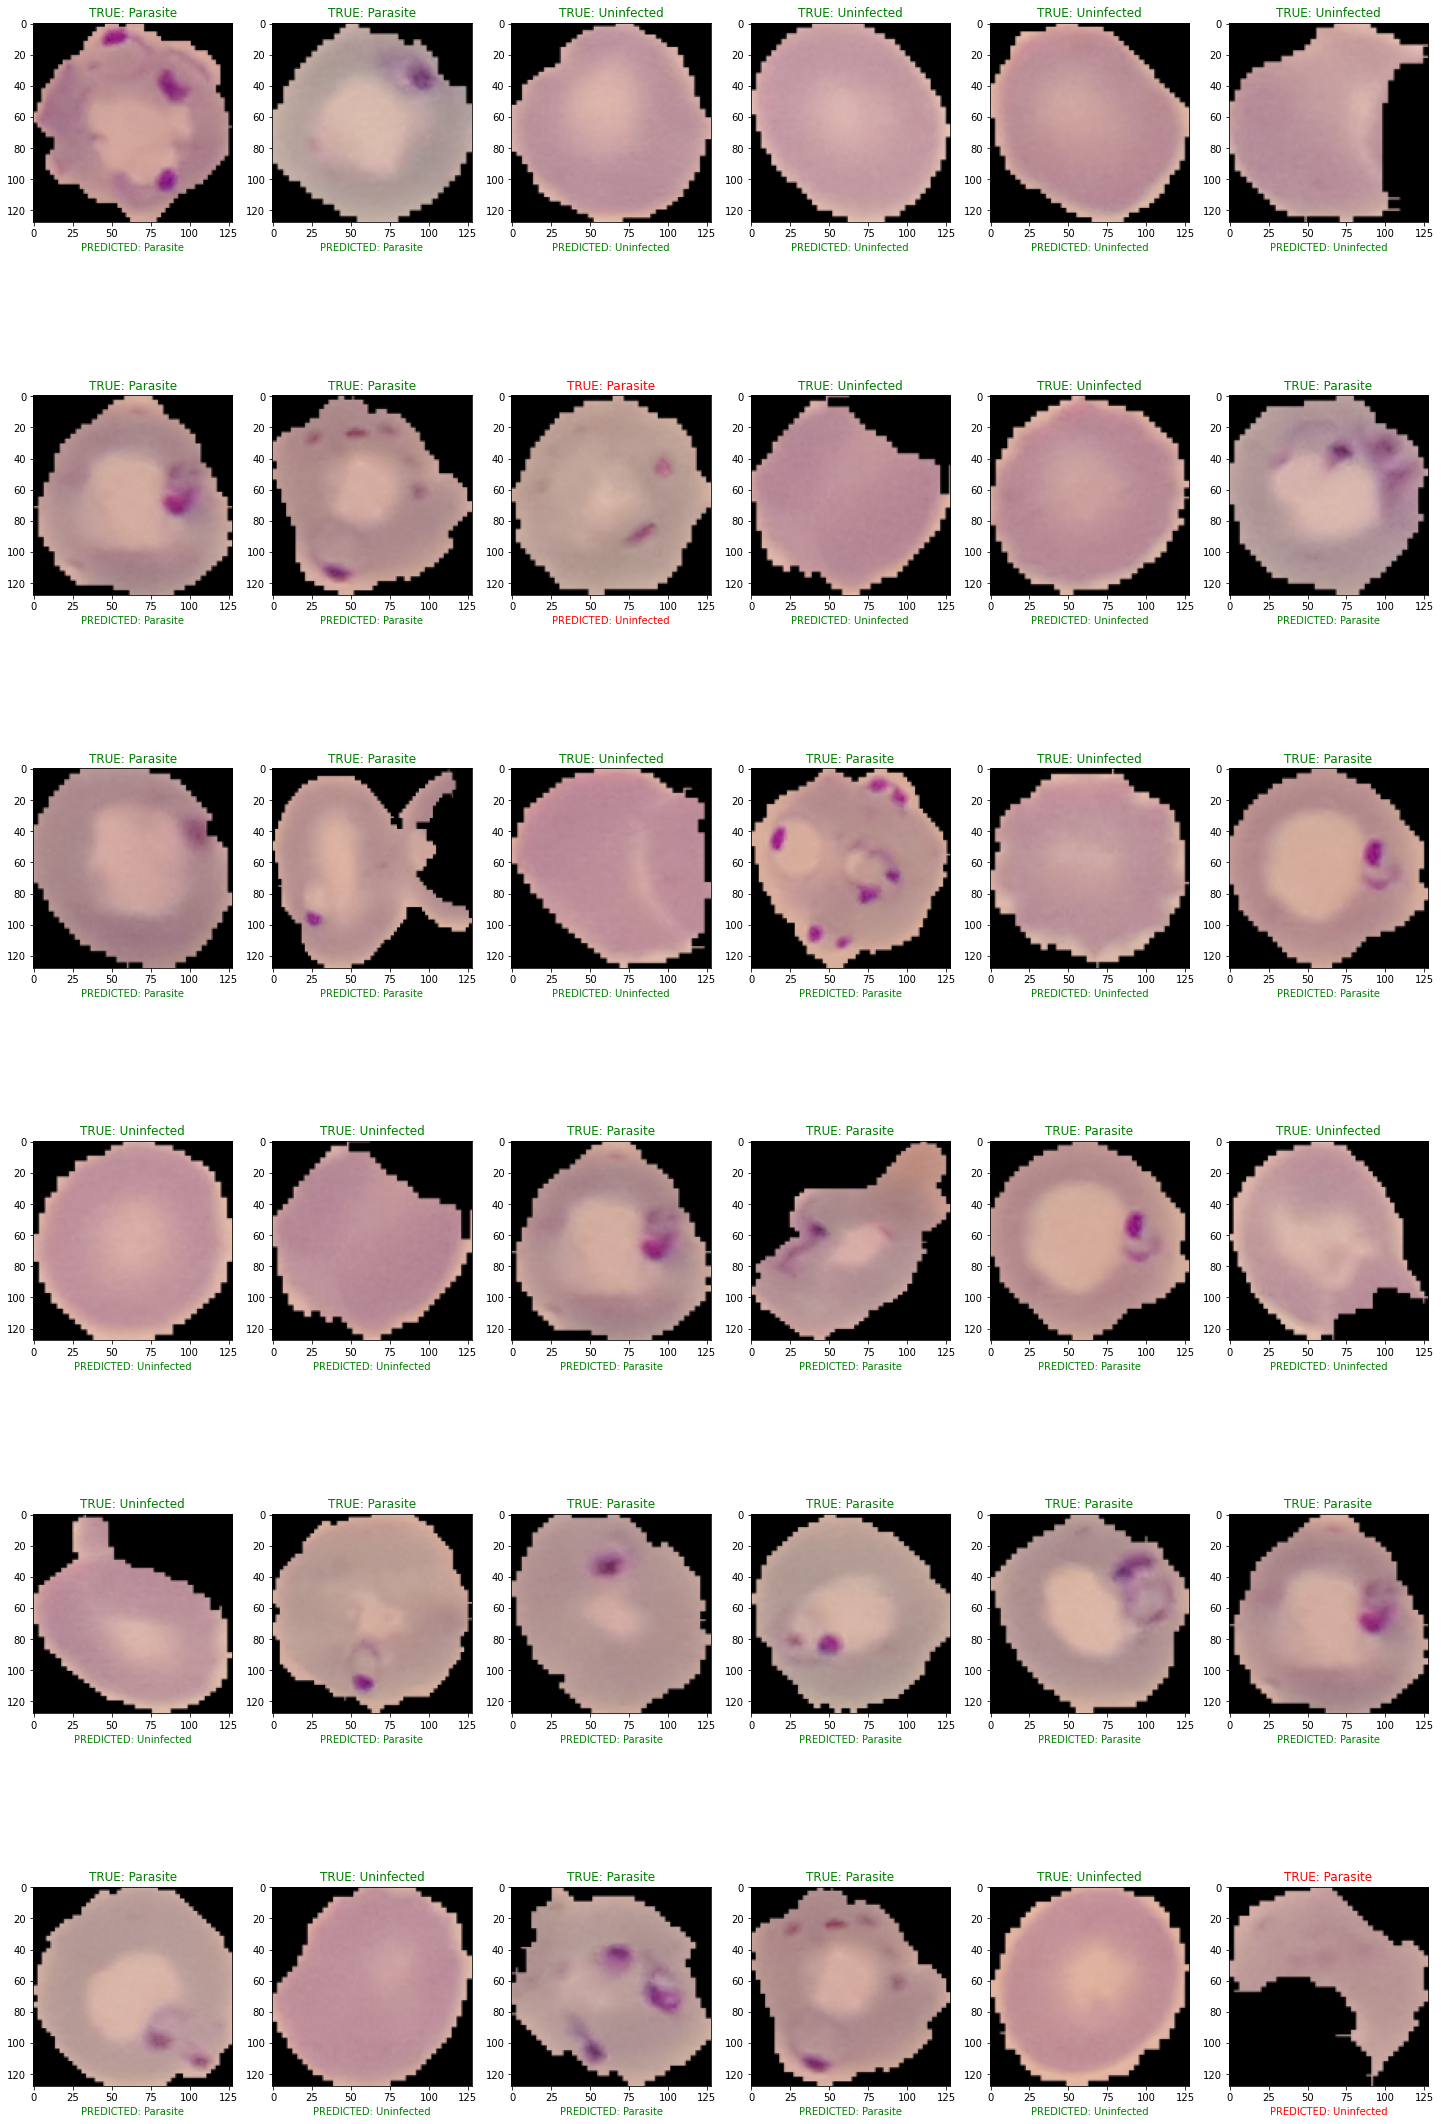

In [86]:
categories=np.sort(os.listdir(test_path))
fig,ax=plt.subplots(6,6,figsize=(25,40))
for i in range(6):
  for j in range(6):
    k=int(np.random.random_sample()*len(test_X))
    if (categories[np.argmax(test_y[k])]==categories[np.argmax(model.predict(test_X)[k])]):
      ax[i,j].set_title("TRUE: " + categories[np.argmax(test_y[k])], color='green')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(test_X)[k])], color='green')
      ax[i,j].imshow(np.array(test_X)[k].reshape(128, 128, 3), cmap='gray')
    else:
      ax[i,j].set_title("TRUE: " + categories[np.argmax(test_y[k])], color='red')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(test_X)[k])], color='red')
      ax[i,j].imshow(np.array(test_X)[k].reshape(128, 128, 3), cmap='gray')